In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [235]:

def find_phase_changes(phases):
    # Calculate the difference between consecutive elements
    diff = np.diff(phases)
    
    # Find the indices where the difference is not zero (i.e., where the phase changes)
    change_indices = np.where(diff != 0)[0]
    
    # Add 1 to the indices to get the position of the change in the original array
    change_indices += 1
    
    return np.concatenate([[0], change_indices, [len(phases)]])



def plot_data(y_seq, y_pred, z_seq, name, lens = 100, have_legend=False):
    # Data simulation
    time = np.linspace(0, lens,lens)
    #input_signal = np.sin(0.1 * time)  # Simulated input signal
    #reconstruction_signal = np.sin(0.1 * time + 0.1)  # Simulated reconstructed signal with slight lag

    input_signal = y_seq[:lens]
    reconstruction_signal = y_pred[:lens]
    y_max = np.max(input_signal[:lens])
    y_min = np.min(input_signal[:lens])

    # Regions: going down (blue), going up (red)
    ground_truth_phases = np.array([0, 1] * 5)  # Simulate ground truth pattern
    phase_changes = np.linspace(0, lens, len(ground_truth_phases)+1)
    phase_changes_pred = find_phase_changes(z_seq[:lens])

    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot input and reconstruction
    if len(y_seq.shape) > 1:
        for i in range(y_seq.shape[1]):
            ax.plot(time, input_signal[:,i], label="Input", color="black")
    else:
        ax.plot(time, input_signal, label="Input", color="black", alpha=0.5)
    ax.plot(time, reconstruction_signal, label="Reconstruction", linestyle="--", color="black")

    for i, phase in enumerate(phase_changes_pred[:-1]):
        ph = z_seq[phase]
        if ph == 0:
            color = 'lightblue'
        elif ph == 1:
            color = 'lightcoral'
        elif ph == 2:
            color = 'lightgreen'
        else:
            color = 'lightgray'
            
        ax.add_patch(Rectangle((phase_changes_pred[i], y_min), phase_changes_pred[i+1] - phase_changes_pred[i], max(y_max,1), facecolor=color, alpha=0.5))

    # Customize the plot
    ax.set_xlim(0, lens)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Time")
    #ax.set_ylabel("Signal")
    #ax.set_yticks([])
    ax.set_xticks(np.arange(0, lens+1, 20))
    ax.set_title(name)

    # Legend    
    handles = [Rectangle((0, 0), 1, 1, color='lightblue', alpha=0.5, label='Mode 1'),
            Rectangle((0, 0), 1, 1, color='lightcoral', alpha=0.5, label='Mode 2'),
            plt.Line2D([0], [0], color="black", lw=1, label='Input'),
            plt.Line2D([0], [0], color="black", lw=1, linestyle="--", label='Reconstruction')]

    ax.legend(handles=handles, loc='lower right')#,  bbox_to_anchor=(-0.3, 1))

    # Labels for rows
    #ax.text(-20, 0+0.3*y_max, name1, fontsize=14, va='center')
    #ax.text(-20, 0, name2, fontsize=14, va='center')

    # Show the plot
    plt.tight_layout()
    plt.show()


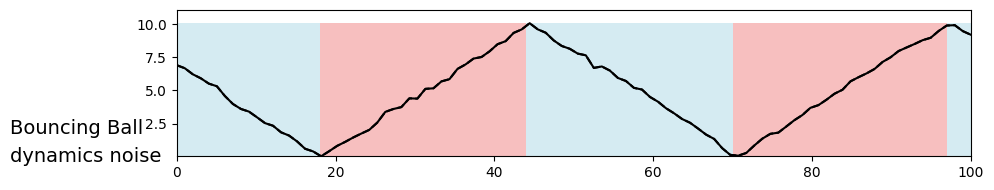

In [79]:
#np.savez('bouncing_ball_noisy_test_1000.npz', y=data_y, z=data_z)
npzfile = np.load('./data/bouncing_ball/bouncing_ball_noisy_test_1000.npz')
data_y = npzfile['y']
data_z = npzfile['z']
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
plot_data(y_seq, y_seq, z_seq, 'Bouncing Ball', 'dynamics noise')

In [16]:
data_y.shape, data_z.shape


((21, 120, 4), (21, 120))

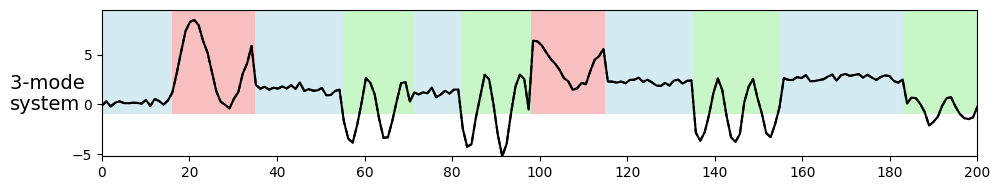

In [78]:
#np.savez('bouncing_ball_noisy_test_1000.npz', y=data_y, z=data_z)
npzfile = np.load('./data/3modesystem_test.npz')
data_y = npzfile['y']
data_z = npzfile['z']

idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
plot_data(y_seq, y_seq, z_seq, '3-mode ', "system", lens=200)

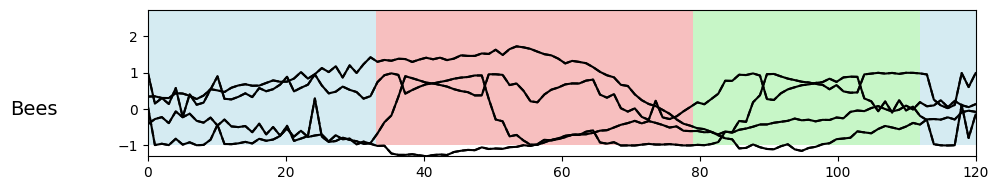

In [87]:
#np.savez('bouncing_ball_noisy_test_1000.npz', y=data_y, z=data_z)
npzfile = np.load('./data/bee_test.npz')
data_y = npzfile['y']
data_z = npzfile['z']

idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
plot_data(y_seq, y_seq, z_seq, '', "Bees", lens=120)

In [127]:
npzfile = np.load('./results/electricity_nips_test.npz')
#np.savez("./results/electricity_nips_test.npz", input_data=input_data, ground_truth=ground_truth, all_mean=all_mean, all_lb=all_lb, all_ub=all_ub, prev_preds=prev_preds, all_z_probs=all_z_probs)
data_y = npzfile['ground_truth']
zprobs = npzfile['all_z_probs']
preds = npzfile['all_mean']

z_seq_inter = np.argmax(zprobs, axis=3)
data_z = np.mean(z_seq_inter,axis=1)

In [128]:
data_y.shape, data_z.shape, preds.shape

((200, 168), (200, 168), (200, 168))

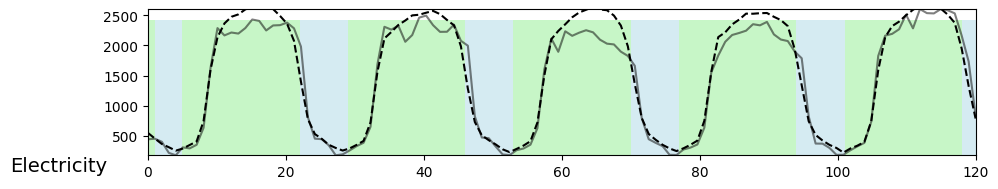

In [146]:
idx = np.random.randint(data_y.shape[0])
y_seq, pred, z_seq = data_y[idx], preds[idx], data_z[idx]
plot_data(y_seq, pred, z_seq, "Electricity", "", lens=120)

In [253]:
npzfile = np.load('./results/traffic_nips_test.npz')
data_y = npzfile['ground_truth']
zprobs = npzfile['all_z_probs']
preds = npzfile['all_mean']

z_seq_inter = np.argmax(zprobs, axis=3)
data_z = z_seq_inter[:,1] #np.mean(z_seq_inter,axis=1)

In [254]:
z_seq_inter.shape

(200, 10, 168)

In [255]:
data_y.shape, data_z.shape, preds.shape

((200, 168), (200, 168), (200, 168))

In [256]:
find_phase_changes(z_seq)

array([  0,   1,   2,   4,   6,   7,   9,  12,  13,  15,  20,  26,  27,
        28,  29,  30,  33,  34,  35,  36,  37,  38,  39,  40,  41,  44,
        45,  46,  47,  49,  50,  52,  53,  57,  58,  59,  60,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  77,
        78,  80,  82,  83,  84,  86,  87,  88,  89,  90,  92,  93,  94,
        95,  96,  97,  98, 100, 101, 102, 103, 106, 107, 108, 110, 111,
       112, 113, 115, 117, 118, 121, 122, 124, 125, 130, 131, 132, 135,
       136, 137, 139, 141, 142, 145, 146, 148, 149, 150, 154, 155, 156,
       157, 158, 161, 162, 168])

In [259]:
z_seq

array([2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 0, 0, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 3,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 0, 0,
       0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3,
       0, 0, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2])

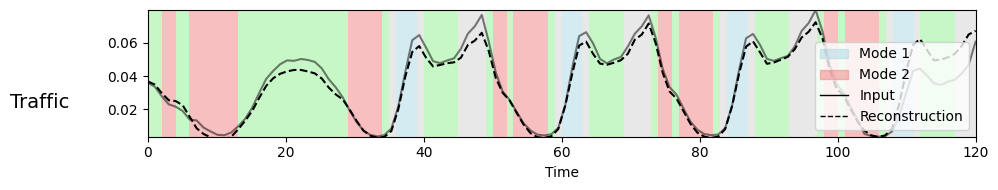

In [261]:
idx = np.random.randint(data_y.shape[0])
y_seq, pred, z_seq = data_y[idx], preds[idx], data_z[idx]
plot_data(y_seq, pred, z_seq, "Traffic", "", lens=120)

2
1
2
1
2
1
2
3
0
3
2
3
1
2
1
2
3
0
3
2
3
0
3
2
1
2
1
2
3
0
3
2
3
0
3
2
1
2
1
2
3
0
3
2
3
2
1
2
1
2
3
0
3
2
3
0
2
1
2
1
2


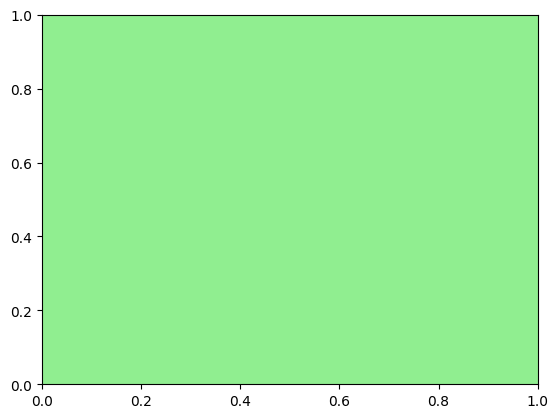

In [208]:
fig, ax = plt.subplots()
y_max = np.max(y_seq)
phase_changes_pred = find_phase_changes(z_seq)
for i, phase in enumerate(phase_changes_pred[:-1]):
    ph = z_seq[phase]
    print(ph)

    if ph == 0:
        color = 'lightblue'
    elif ph == 1:
        color = 'lightcoral'
    elif ph == 2:
        color = 'lightgreen'
    else:
        color = 'lightgray'
        
    ax.add_patch(Rectangle((phase_changes_pred[i], 0), phase_changes_pred[i+1] - phase_changes_pred[i], max(y_max,1), facecolor=color, alpha=1))
